In [812]:
import warnings

# Ignore the warnings of statsmodels
warnings.filterwarnings("ignore", category=FutureWarning, module='statsmodels')
warnings.simplefilter("ignore")


In [813]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
from scipy.stats import boxcox 



In [814]:
data = pd.read_csv("cinemaTicket_Ref.csv")

In [815]:
data['date'] = pd.to_datetime(data['date']) #Change the column 'date' as a date
data.head()


,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [816]:
data['date'].sort_values().unique() # Viewing the dates in order, it can be noticed that there are 2 dates that do not follow 
                                    # the frequency of the others (by one day).

<DatetimeArray>
['2018-02-21 00:00:00', '2018-02-23 00:00:00', '2018-03-14 00:00:00',
 '2018-03-15 00:00:00', '2018-03-16 00:00:00', '2018-03-17 00:00:00',
 '2018-03-18 00:00:00', '2018-03-19 00:00:00', '2018-03-20 00:00:00',
 '2018-03-21 00:00:00',
 ...
 '2018-10-26 00:00:00', '2018-10-27 00:00:00', '2018-10-28 00:00:00',
 '2018-10-29 00:00:00', '2018-10-30 00:00:00', '2018-10-31 00:00:00',
 '2018-11-01 00:00:00', '2018-11-02 00:00:00', '2018-11-03 00:00:00',
 '2018-11-04 00:00:00']
Length: 234, dtype: datetime64[ns]

There are several ways to approach this dataset. One of them, which is what we will do, is to address the total sales for all cinemas. Another approach is to analyze the sales cinema by cinema, and another possibility is to approach it by movie. In all of these, we will lose some information from the data.

In [817]:
data_1 = data.copy()
data_1 = data_1.drop(['month', 'quarter', 'day'], axis=1) # These columns aport the same information as 'date'

# This two rows are the ones that don't follow the frequency
data_1 = data_1.drop(data[(data_1['date'] == '2018-02-21 00:00:00') | (data_1['date'] =='2018-02-23 00:00:00')].index) 
data_2 = data_1.copy()


When addressing the total, some columns will become irrelevant as they provide specific data about cinemas or movies, which is irrelevant in the total.

In [818]:
data_1 = data_1.drop(['film_code', 'cinema_code', 'show_time'], axis = 1)


In [819]:
df_1 = data_1.copy()
# Here we group it by their date, we use the total sum to some variables and the mean for others
data_1 = data_1.groupby('date').sum()
df_1 = df_1.groupby('date').mean()
data_1['occu_perc'] = df_1['occu_perc']
data_1

,total_sales,tickets_sold,tickets_out,occu_perc,ticket_price,ticket_use,capacity
date,,,,,,,
2018-03-14,2202300484,20104,30,11.457937,1.648094e+07,20074,201009.097319
2018-03-15,4479008974,41274,33,16.925195,2.307049e+07,41241,269355.809792
2018-03-16,5386645987,51761,76,17.678305,2.737739e+07,51685,335681.613312
2018-03-17,3367302992,38026,32,13.620901,2.754843e+07,37994,379789.308332
2018-03-18,3298541496,34424,102,11.631185,3.172340e+07,34322,409369.006835
...,...,...,...,...,...,...,...
2018-10-31,4871998000,47644,59,13.084963,6.049211e+07,47585,546402.853650
2018-11-01,9071854998,80694,131,20.348762,6.531210e+07,80563,567873.274882
2018-11-02,9744695000,86748,163,21.733965,6.380986e+07,86585,542144.948471


In [820]:
data_1['Boxcox_sales'], lam = boxcox(data_1['total_sales'])  #Aplicamos boxcox
data_1 = data_1.drop(['total_sales'], axis=1)
data_1

,tickets_sold,tickets_out,occu_perc,ticket_price,ticket_use,capacity,Boxcox_sales
date,,,,,,,
2018-03-14,20104,30,11.457937,1.648094e+07,20074,201009.097319,112821.097928
2018-03-15,41274,33,16.925195,2.307049e+07,41241,269355.809792,161975.922938
2018-03-16,51761,76,17.678305,2.737739e+07,51685,335681.613312,177940.298445
2018-03-17,38026,32,13.620901,2.754843e+07,37994,379789.308332,140065.850079
2018-03-18,34424,102,11.631185,3.172340e+07,34322,409369.006835,138601.408065
...,...,...,...,...,...,...,...
2018-10-31,47644,59,13.084963,6.049211e+07,47585,546402.853650,169066.454807
2018-11-01,80694,131,20.348762,6.531210e+07,80563,567873.274882,232058.471399
2018-11-02,86748,163,21.733965,6.380986e+07,86585,542144.948471,240672.476946


<Axes: xlabel='date'>

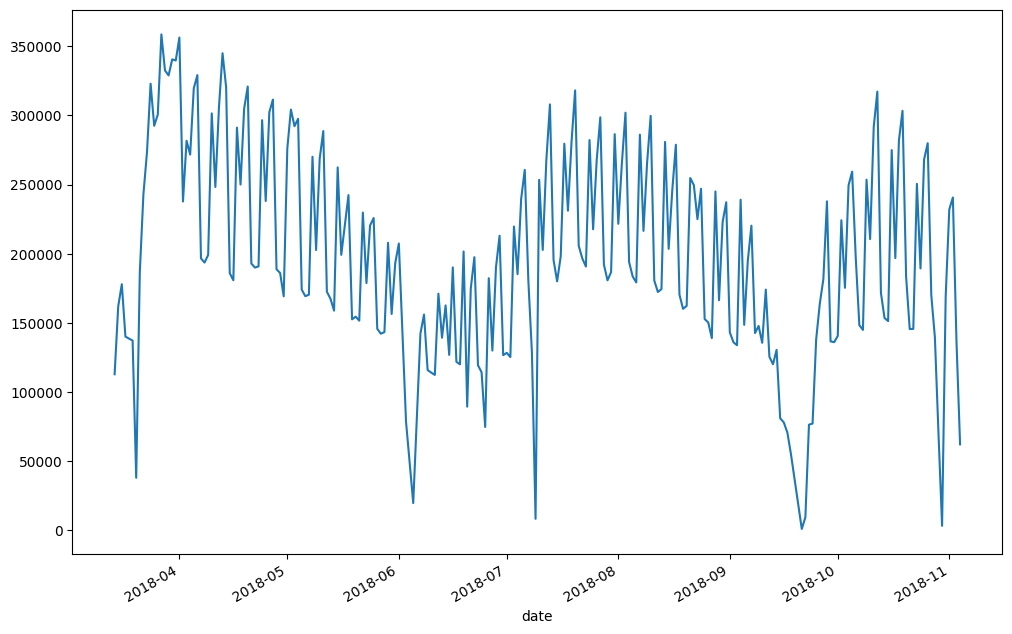

In [821]:
data_1['Boxcox_sales'].plot(figsize=(12, 8)) # We plot the temporal series

## Pass-10 method

<Axes: xlabel='date'>

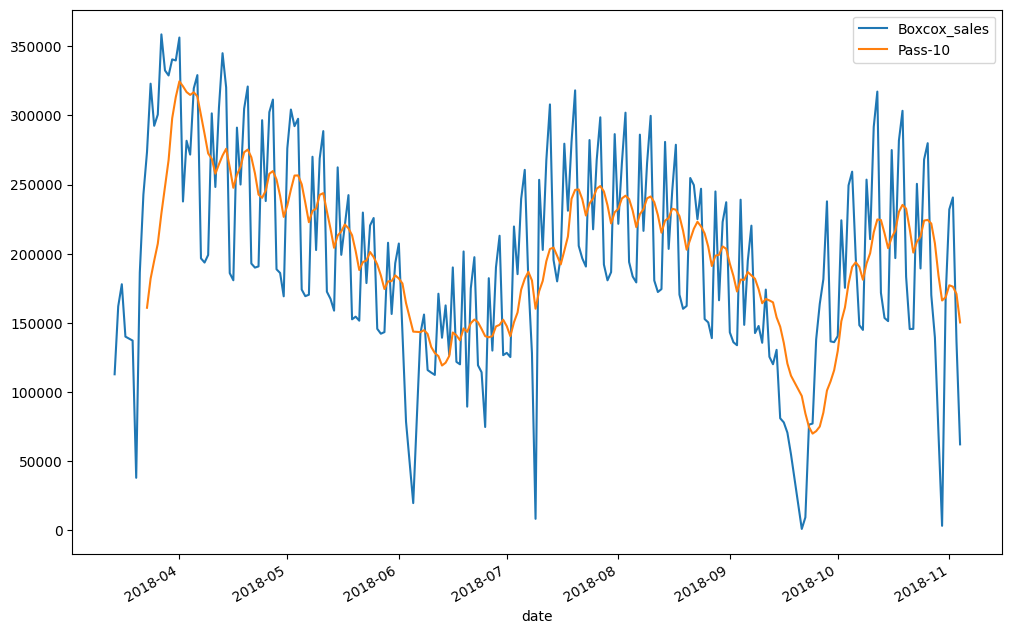

In [822]:
data_1['Pass-10'] = data_1['Boxcox_sales'].rolling(10).mean()
data_1[['Boxcox_sales','Pass-10']].plot(figsize=(12, 8))

## EWMA method

<Axes: xlabel='date'>

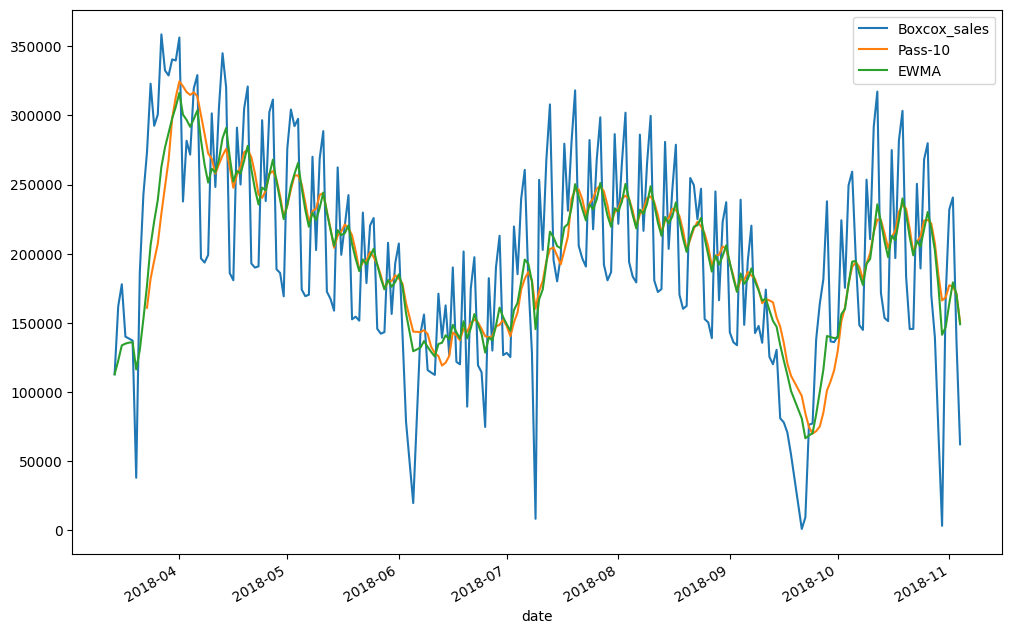

In [823]:
alpha = 0.2
data_1['EWMA'] = data_1['Boxcox_sales'].ewm(alpha=alpha, adjust=False).mean()
data_1[['Boxcox_sales','Pass-10', 'EWMA']].plot(figsize=(12, 8))

## SimpleExpSmoothing

In [824]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


In [825]:
ses = SimpleExpSmoothing(data_1['Boxcox_sales'], initialization_method='legacy-heuristic') 
res = ses.fit(smoothing_level=alpha, optimized=False)
res 

We apply it in the entire dataset

In [826]:
data_1['SES'] = res.predict(start=data_1.index[0], end=data_1.index[-1])
data_1['SES'] 

date
2018-03-14    112821.097928
2018-03-15    112821.097928
2018-03-16    122652.062930
2018-03-17    133709.710033
2018-03-18    134980.938042
                  ...      
2018-10-31    141393.027766
2018-11-01    146927.713174
2018-11-02    163953.864819
2018-11-03    179297.587244
2018-11-04    170770.210203
Name: SES, Length: 232, dtype: float64

<Axes: xlabel='date'>

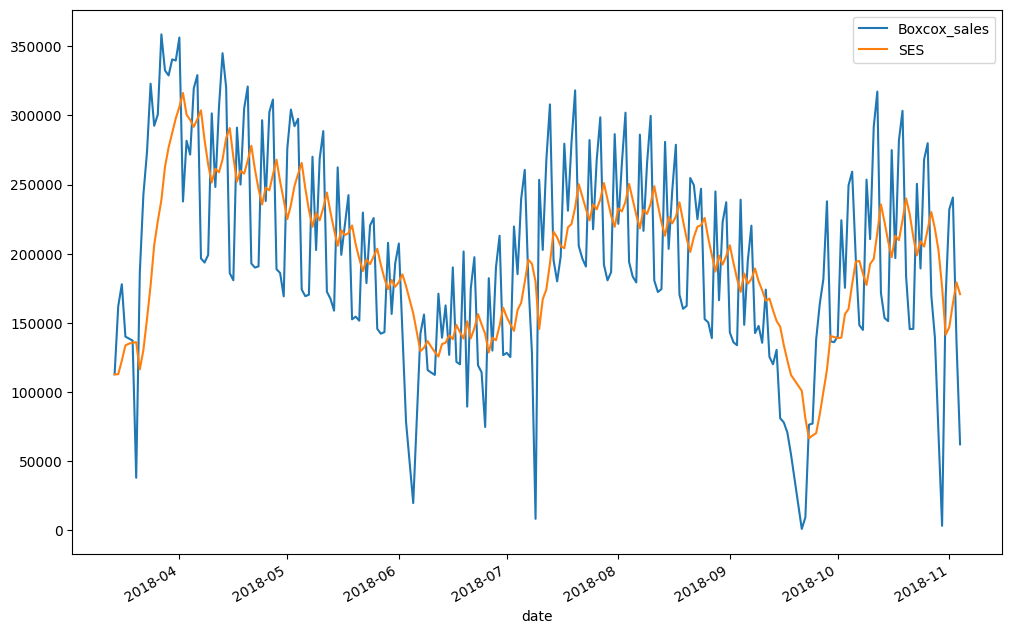

In [827]:
data_1[['Boxcox_sales', 'SES']].plot(figsize=(12,8))

Now we use a train and a test set

In [828]:
N_test = 75
train = data_1.iloc[:-N_test]
test = data_1.iloc[-N_test:]



<Axes: xlabel='date'>

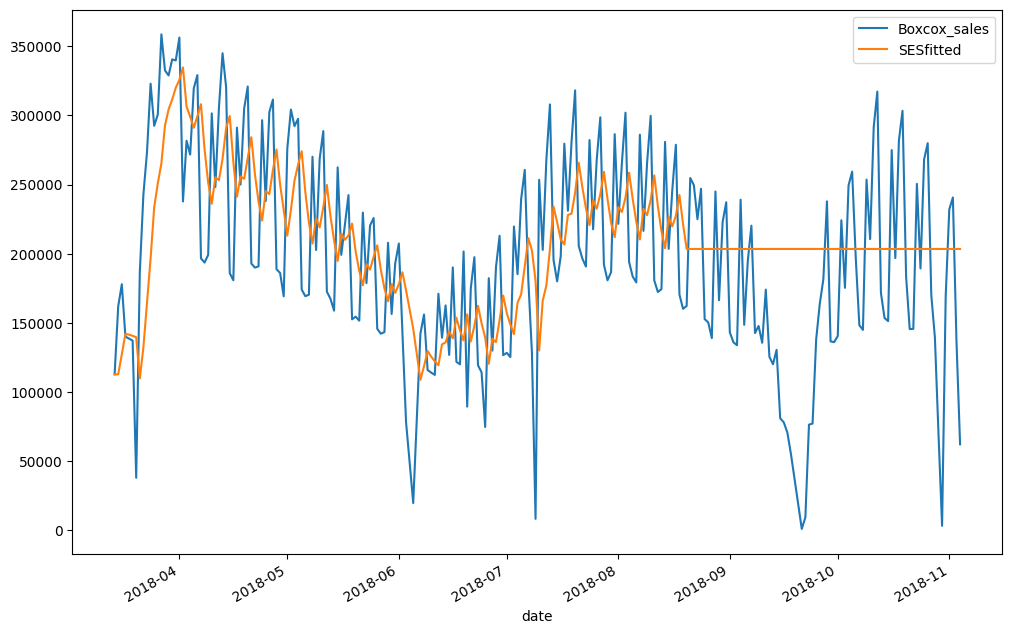

In [829]:
train_idx = data_1.index <= train.index[-1]
test_idx = data_1.index > train.index[-1]

ses = SimpleExpSmoothing(
    train['Boxcox_sales'],
    initialization_method='legacy-heuristic')
res = ses.fit()

data_1.loc[train_idx, 'SESfitted'] = res.fittedvalues
data_1.loc[test_idx, 'SESfitted'] = res.forecast(N_test).values
data_1[['Boxcox_sales', 'SESfitted']].plot(figsize=(12, 8))


In [830]:
res.params

{'smoothing_level': 0.2927906976744186,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112821.09792755282,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Holt winters
We fit all the dataset and then we apply it on the train and test 

<Axes: xlabel='date'>

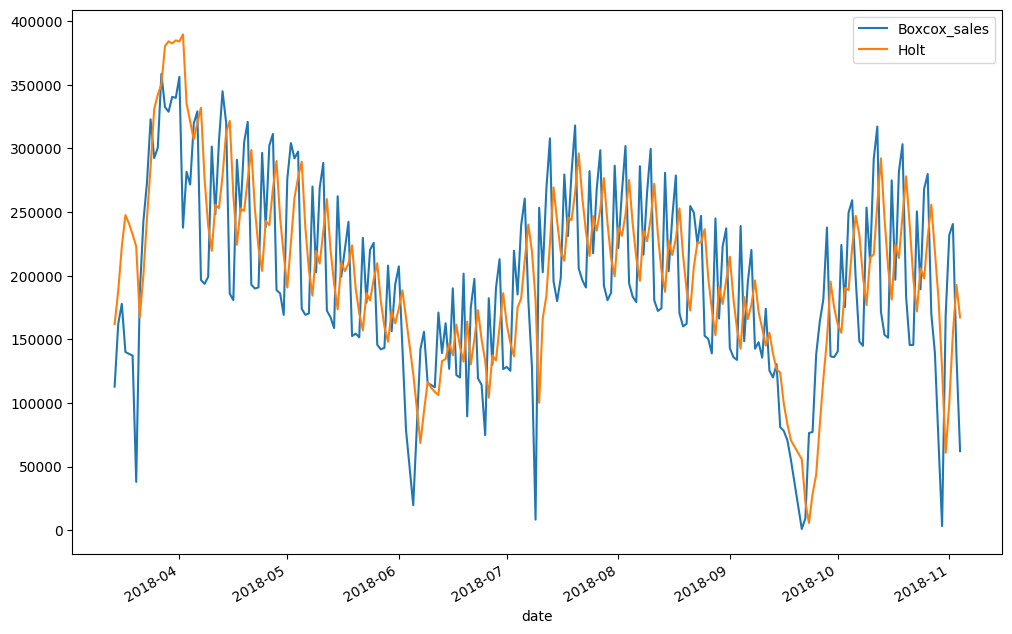

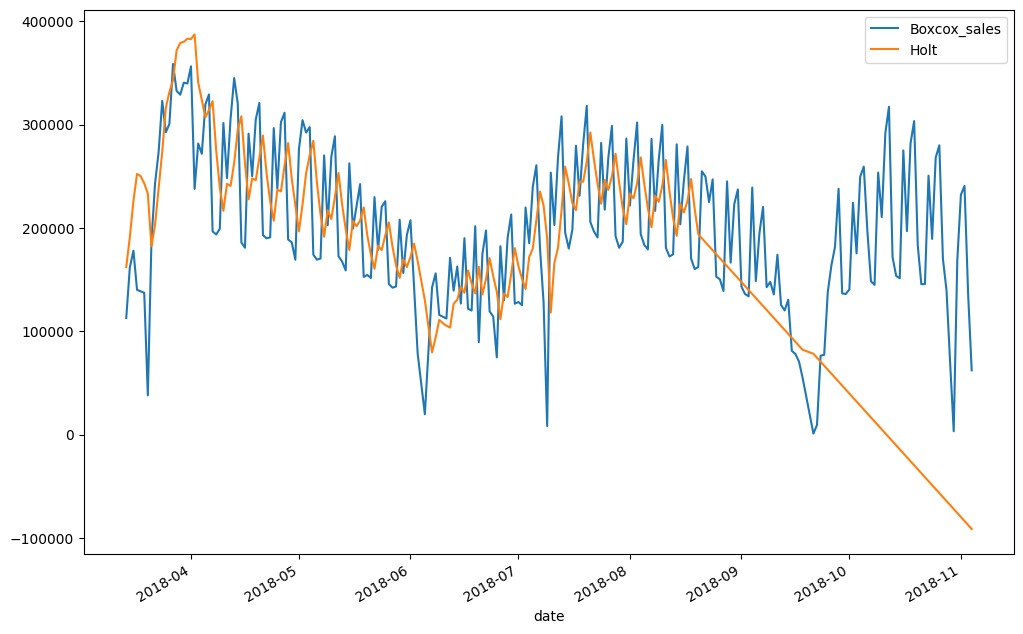

In [831]:
from statsmodels.tsa.holtwinters import Holt

holt = Holt(
    data_1['Boxcox_sales'],
    initialization_method='legacy-heuristic')
res_h = holt.fit()
data_1['Holt'] = res_h.fittedvalues
data_1[['Boxcox_sales', 'Holt']].plot(figsize=(12, 8))

holt = Holt(train['Boxcox_sales'], initialization_method='legacy-heuristic')
res_h = holt.fit()
data_1.loc[train_idx, 'Holt'] = res_h.fittedvalues
data_1.loc[test_idx, 'Holt'] = res_h.forecast(N_test).values
data_1[['Boxcox_sales', 'Holt']].plot(figsize= (12, 8))


In [832]:
import warnings

# Ignore the warnings of statsmodels
warnings.filterwarnings("ignore", category=FutureWarning, module='statsmodels')

## Holt Winters Exponential Smoothing

In [833]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

def estimator(x): 
    # This function is like a 'GridSearch' but manual
    hw = ExponentialSmoothing(
    train['Boxcox_sales'],
    initialization_method='legacy-heuristic', trend=None, seasonal='add', seasonal_periods=x)
    res_hw = hw.fit()

    # We use the metric of mean squared error to choose the best seasonal period
    return mean_squared_error(res_hw.forecast(N_test), test['Boxcox_sales'])

best_rmse = float('inf')
best_period = None

# We get the best seasonal period and its rmse
for x in range(2, 120):
    rmse = estimator(x)
    if rmse < best_rmse:
        best_rmse = rmse
        best_period = x
print(best_rmse, best_period)


3833433039.663033 62


9040.817305838998 10718.774076558186


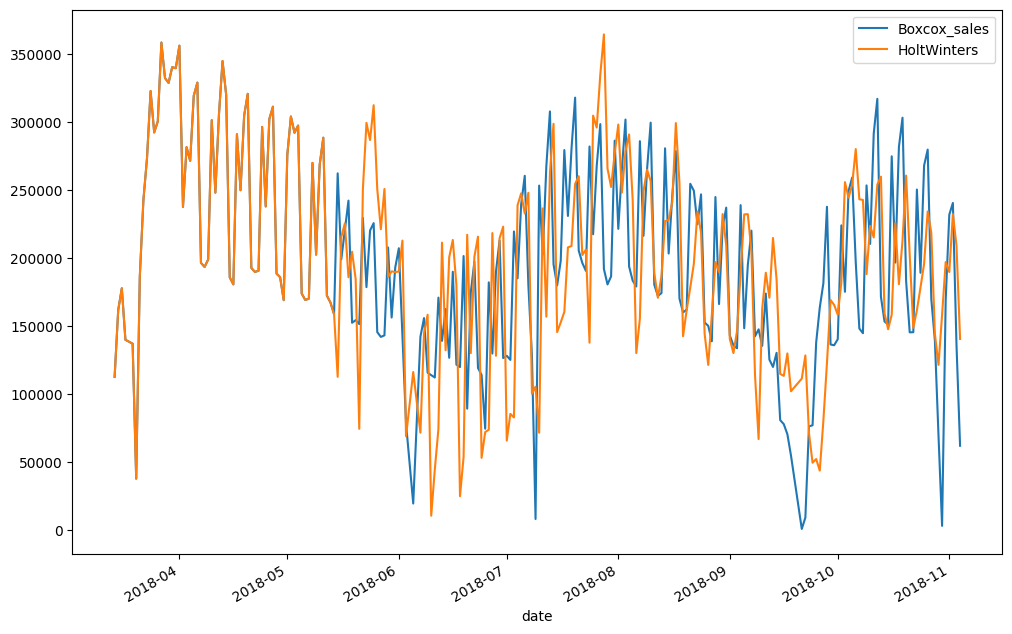

In [834]:
# Use the best period in the training set and show results
hw = ExponentialSmoothing(
    train['Boxcox_sales'],
    initialization_method='legacy-heuristic', trend=None, seasonal='add', seasonal_periods=62)
res_hw = hw.fit()
data_1.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
data_1.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test).values
data_1[['Boxcox_sales', 'HoltWinters']].plot(figsize=(12, 8))

# Reescalate the mean squared error
error_train, error_test = mean_squared_error(res_hw.fittedvalues, train['Boxcox_sales']), mean_squared_error(res_hw.forecast(N_test), test['Boxcox_sales'])
scaler = max(data_1['Boxcox_sales']) - min(data_1['Boxcox_sales'])
print(error_train/scaler, error_test/scaler)

In [835]:
res_hw.params

{'smoothing_level': 0.35857142857142854,
 'smoothing_trend': nan,
 'smoothing_seasonal': 0.33957983193277314,
 'damping_trend': nan,
 'initial_level': 202130.1079228624,
 'initial_trend': nan,
 'initial_seasons': array([ -89309.00999531,  -40154.18498499,  -24189.80947824,
         -62064.2578438 ,  -63528.69985802,  -64940.09488848,
        -164168.57136299,  -15719.94733085,   40695.13588524,
          71402.94889842,  120837.91045602,   90380.01653107,
          98512.13191731,  156490.08457895,  130423.8551117 ,
         126786.38351251,  138408.48686328,  137639.1630106 ,
         154217.05300982,   35642.45173112,   79552.80557968,
          69577.96514339,  117428.50267289,  127025.17519601,
          -5472.85760096,   -8512.19144438,   -3019.53462462,
          99376.24242325,   46138.43048253,  103626.79638019,
         142882.59300522,  118159.70460718,  -16180.05370245,
         -21320.80617674,   89067.86595285,   47907.36188889,
         102771.779669  ,  118800.22114546, 